In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [4]:
# Fonction pour charger et valider une image
def load_image(image_path, mode='auto'):
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Erreur : L'image {image_path} n'est pas trouvée.")
    
    if mode == 'gray':
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError("Erreur : Impossible de charger l'image en niveaux de gris.")
        return img, False
    elif mode == 'rgb':
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError("Erreur : Impossible de charger l'image RGB.")
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), True
    else:  # mode='auto'
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError("Erreur : Impossible de charger l'image.")
        # Détection automatique : si tous les canaux sont identiques, c'est grayscale
        if (img[:,:,0] == img[:,:,1]).all() and (img[:,:,1] == img[:,:,2]).all():
            return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), False
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), True

In [5]:
# Fonction pour valider un noyau
def validate_kernel(kernel):
    if not isinstance(kernel, np.ndarray) or len(kernel.shape) != 2:
        raise ValueError("Le noyau doit être une matrice 2D.")
    if kernel.shape[0] != kernel.shape[1]:
        raise ValueError("Le noyau doit être carré.")
    if kernel.shape[0] % 2 == 0:
        raise ValueError("Le noyau doit avoir une taille impaire.")

In [6]:
# Fonction pour effectuer la convolution
def perform_convolution(img, kernel):
    validate_kernel(kernel)
    if len(img.shape) not in [2, 3]:
        raise ValueError("L'image doit être en niveaux de gris (2D) ou RGB (3D).")
    if len(img.shape) == 3 and img.shape[2] != 3:
        raise ValueError("L'image RGB doit avoir 3 canaux.")

    k_size = kernel.shape[0]
    pad = k_size // 2
    if len(img.shape) == 3:
        height, width, channels = img.shape
        output = np.zeros_like(img, dtype=np.float32)
        padded_img = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='edge')
        for c in range(channels):
            for i in range(height):
                for j in range(width):
                    output[i, j, c] = np.sum(padded_img[i:i+k_size, j:j+k_size, c] * kernel)
    else:
        height, width = img.shape
        output = np.zeros_like(img, dtype=np.float32)
        padded_img = np.pad(img, ((pad, pad), (pad, pad)), mode='edge')
        for i in range(height):
            for j in range(width):
                output[i, j] = np.sum(padded_img[i:i+k_size, j:j+k_size] * kernel)
    
    return np.clip(output, 0, 255).astype(np.uint8)

In [7]:
# Fonction pour afficher les résultats
def show_results(images, titles, is_color):
    n = len(images)
    cols = 4
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    for i in range(n):
        plt.subplot(rows, cols, i + 1)
        plt.title(titles[i], fontsize=10)
        plt.imshow(images[i], cmap='gray' if not is_color else None)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
# Définir les noyaux
def get_kernels():
    return [
        # Flou
        (np.ones((3, 3)) / 9, "Moyenne 3x3"),
        (np.ones((5, 5)) / 25, "Moyenne 5x5"),
        (np.ones((7, 7)) / 49, "Moyenne 7x7"),
        # Sobel
        (np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), "Sobel H"),
        (np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), "Sobel V"),
        # Netteté
        (np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]), "Netteté"),
        # Contours
        (np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]), "Contours"),
        # Laplacien
        (np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]), "Laplacien"),
        # Aléatoires
        (np.random.RandomState(100).rand(3, 3) / np.random.RandomState(100).rand(3, 3).sum(), "Aléatoire 3x3"),
        (np.random.RandomState(100).rand(5, 5) / np.random.RandomState(100).rand(5, 5).sum(), "Aléatoire 5x5"),
        (np.random.RandomState(100).rand(7, 7) / np.random.RandomState(100).rand(7, 7).sum(), "Aléatoire 7x7")
    ]

In [9]:
# Fonction principale
def apply_filters(image_path):
    # Charger l'image
    img, is_color = load_image(image_path)
    
    # Obtenir les noyaux
    kernels = get_kernels()
    
    # Appliquer les filtres
    results = [img]
    titles = ["Image Originale"]
    for kernel, name in kernels:
        filtered = perform_convolution(img, kernel)
        results.append(filtered)
        titles.append(name)
        # Sauvegarder
        filename = f"{name.lower().replace(' ', '_')}_{'color' if is_color else 'gray'}.jpg"
        if is_color:
            cv2.imwrite(filename, cv2.cvtColor(filtered, cv2.COLOR_RGB2BGR))
        else:
            cv2.imwrite(filename, filtered)
    
    # Afficher
    show_results(results, titles, is_color)

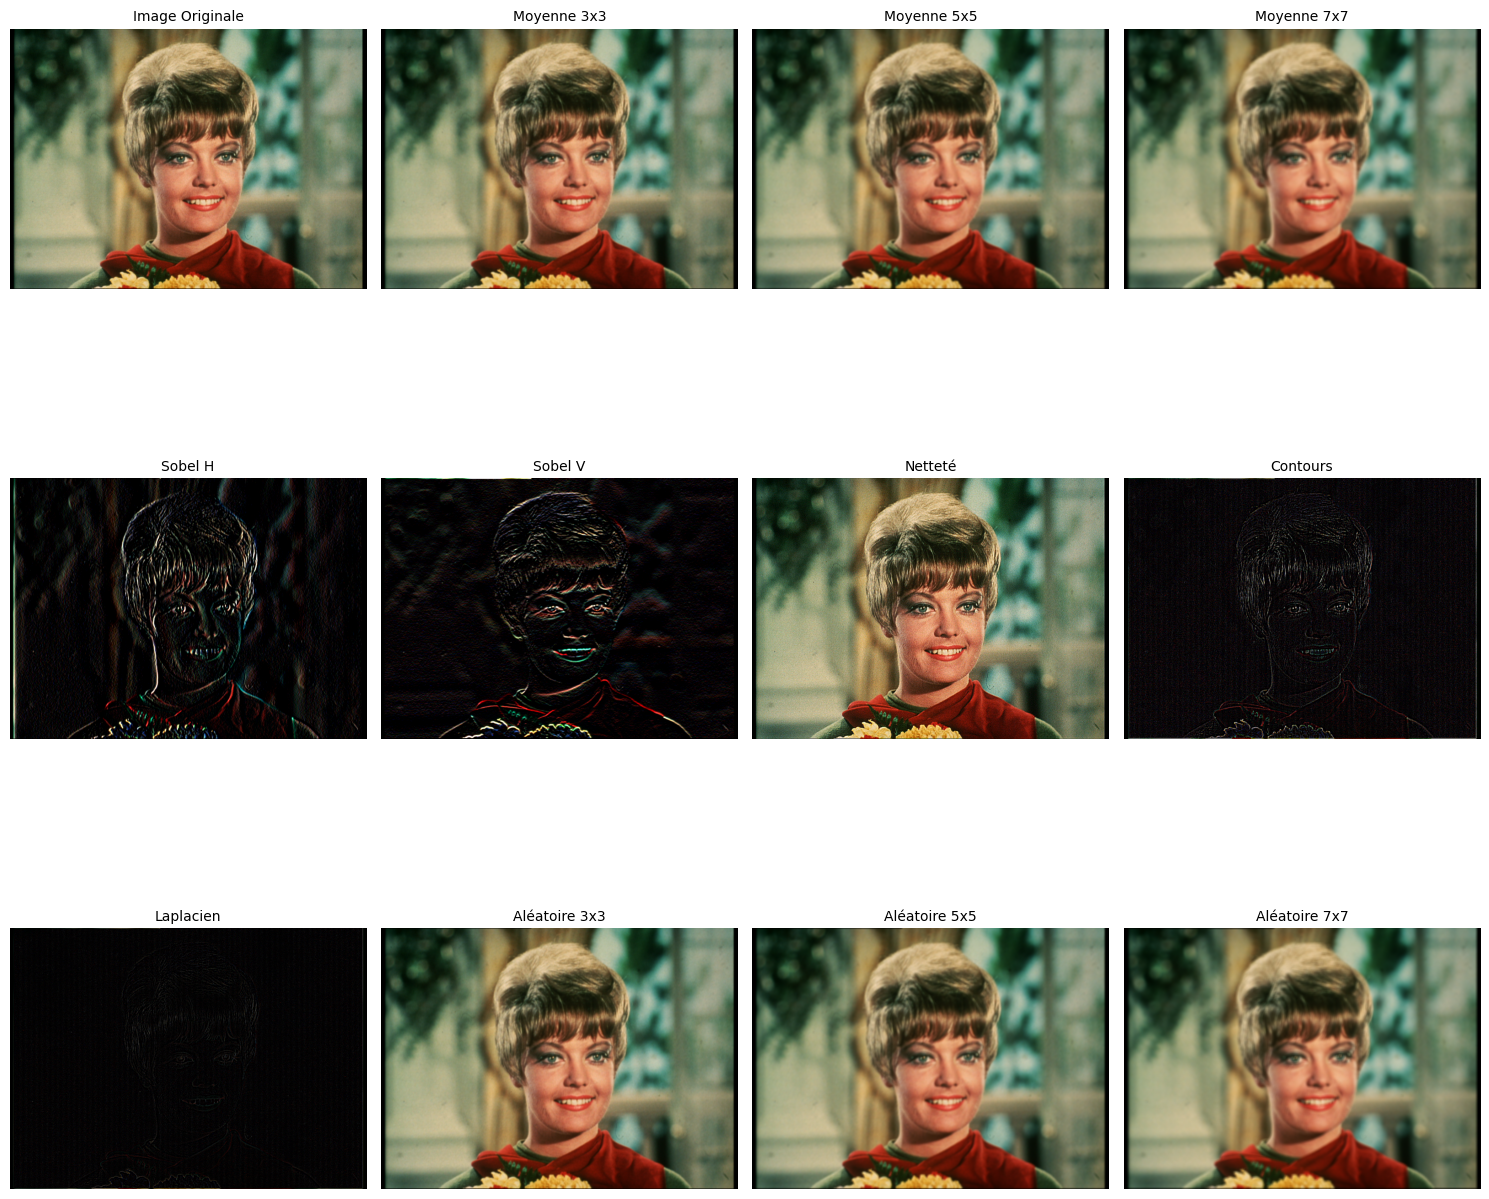

In [11]:
if __name__ == "__main__":
    image_path = "ZeldaColor.bmp"  # À remplacer par une image valide
    apply_filters(image_path)

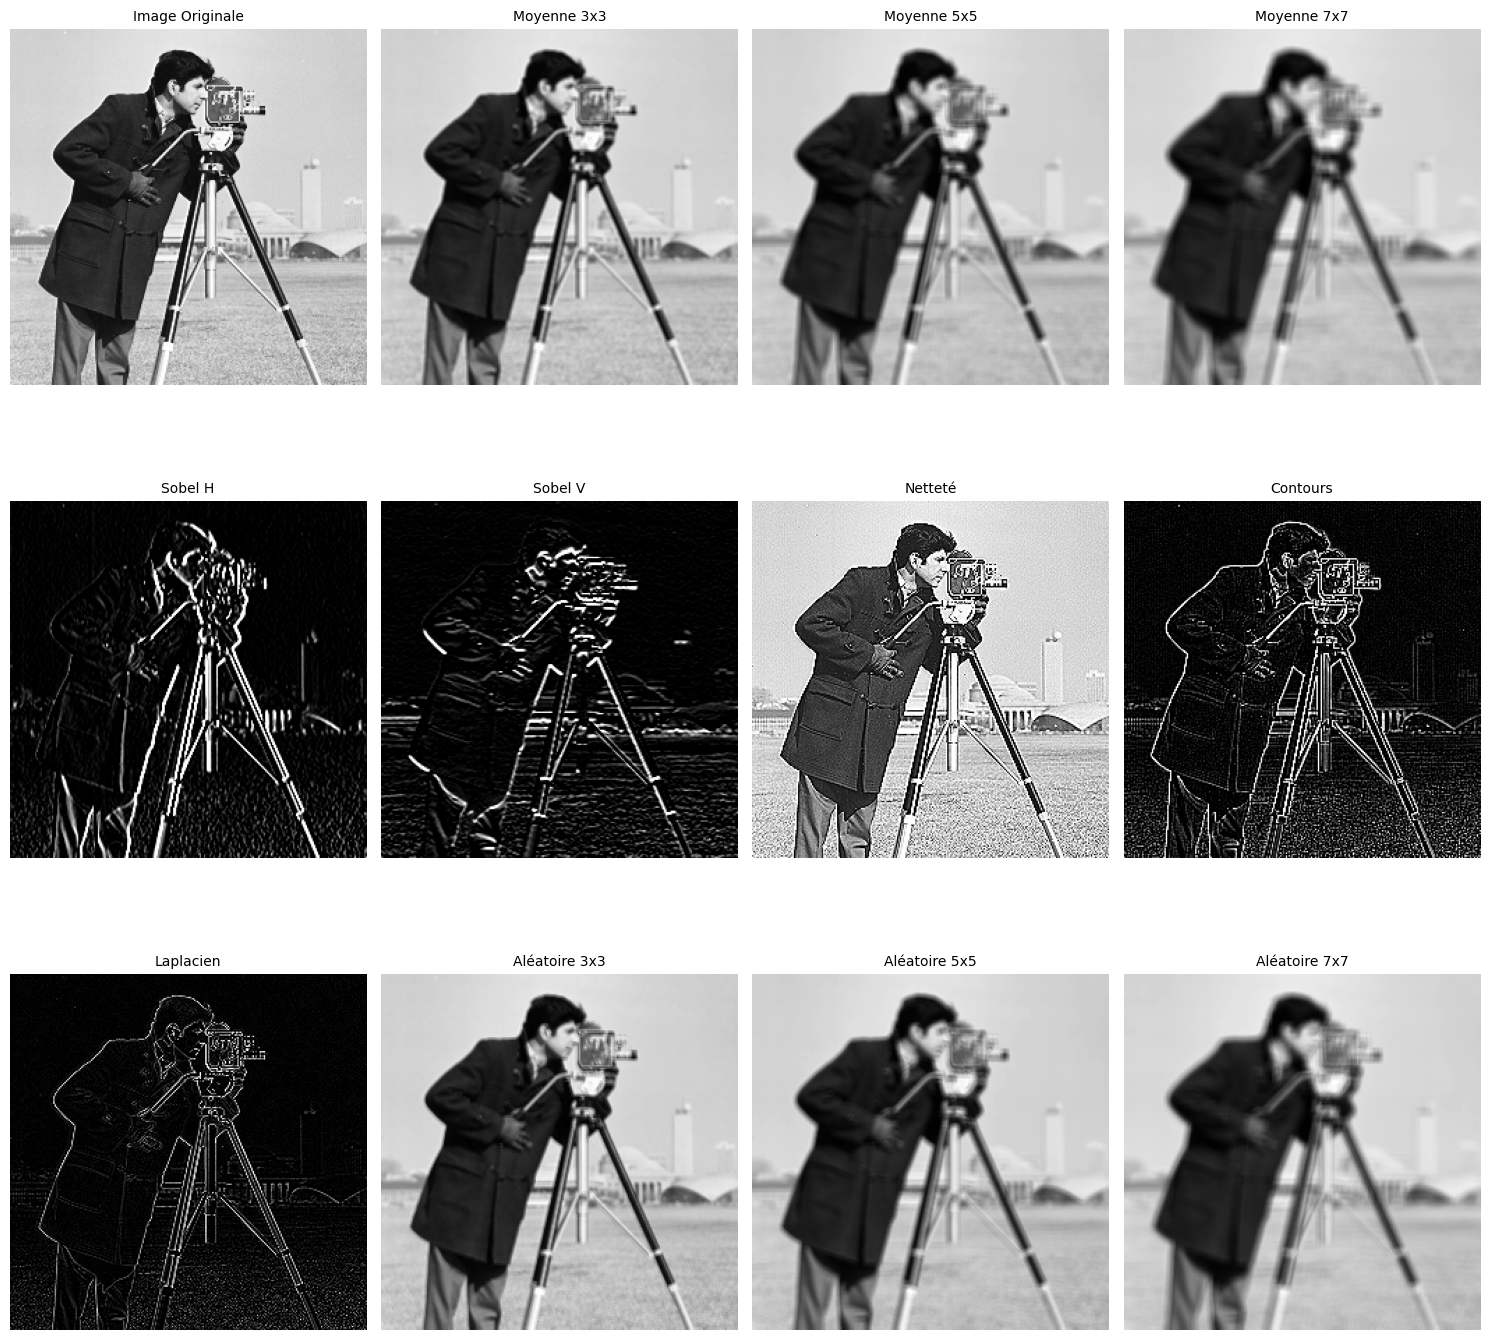

In [12]:
if __name__ == "__main__":
    image_path = "cameraman.bmp"  # À remplacer par une image valide
    apply_filters(image_path)